In [40]:
from astropy.io import fits
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm, LogNorm

In [9]:
hf = fits.open(os.path.join(os.getenv('CENSAI_PATH'), "data", "kappa_000000_spl_xz.fits"))

In [16]:
hf.info()

Filename: /home/alexandre/Desktop/Projects/Censai/data/kappa_000000_spl_xz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (188, 188)   float32   
  1  LENSING POTENTIAL    1 ImageHDU         8   (188, 188)   float32   
  2  DEFLECTION ANGLES    1 ImageHDU         9   (2, 188, 188)   float32   
  3  SHEAR1        1 ImageHDU         8   (188, 188)   float32   
  4  SHEAR2        1 ImageHDU         8   (188, 188)   float32   
  5  KAPPA VARIANCE    1 ImageHDU         8   (188, 188)   float32   
  6  DEFLECTION ANGLES VARIANCE    1 ImageHDU         9   (2, 188, 188)   float32   


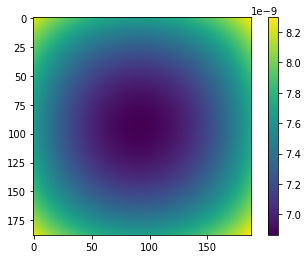

In [18]:
plt.imshow(hf[1].data)
plt.colorbar()

In [19]:
psi = hf[1].data

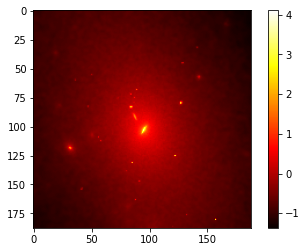

In [35]:
plt.imshow(np.log(hf[0].data), cmap="hot")
plt.colorbar()

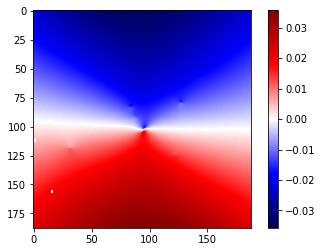

In [45]:
alpha = hf[2].data
plt.imshow(alpha[..., 1], cmap="seismic", norm=CenteredNorm())
plt.colorbar()

In [49]:
alpha.max()

nan

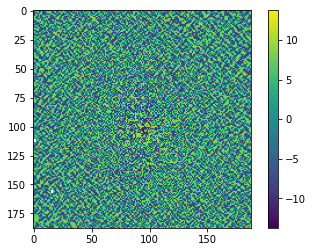

In [56]:
plt.imshow(np.arcsinh(hf[4].data))
plt.colorbar()

In [52]:
gam1 = hf[3].data

In [54]:
np.nanmax(gam1)

977060.1